 # Airbnb -> Boston vs Seattle, data wrangling and comparisons
 
 ## Business understanding of the problem
 
 In this notebook three different questions will be answered
 
 1. Is there any difference in the reviews scores for Boston and Seattle?
 2. Is there any difference in the reviews score regarding to price, for Boston and Seattle?
 3. Is there any difference in the words included in the description of listings between Boston and Seattle?
 
 
 - The questions will be answered to gain knowledge and understand trends in the Boston and Seattle datasets, as well as highlighting trends in the differences between the two cities.

## Import packages needed for the Observations

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()

%matplotlib inline

os.chdir(r"C:/Users\Elias\Udacity\medium")

## Data understanding of the problem

### Import files needed for the analysis

- calendar.csv: File with prices over time for Boston respectively Seattle
- listings.csv: A lot of variables included in listing, such as review score, summary of review and weekly price
- reviews.csv: Date for review, comments in the review and name of reviewer

In [6]:
calendar_b = pd.read_csv('calendar.csv')
listings_b = pd.read_csv('listings.csv')
reviews_b = pd.read_csv('reviews.csv')

calendar_s = pd.read_csv('calendar_s.csv')
listings_s = pd.read_csv('listings_s.csv')
reviews_s = pd.read_csv('reviews_s.csv')

### Explore Boston and Seattle data
- In this part Boston and Seattle data will be explored

In [13]:
reviews_b.shape, calendar_b.shape, listings_b.shape, reviews_s.shape, calendar_s.shape, listings_s.shape

((68275, 6), (643037, 4), (3585, 95), (84849, 6), (934542, 4), (3818, 92))

##### Boston
- Reviews, Boston: 68.275 rows, 6 columns
- Calendar, Boston: 43.037 rows, 4 columns
- Listings, Boston: 3.585 rows, 95 columns

##### Seattle
- Reviews, Seattle: 84.849 rows, 6 columns
- Calendar, Seattle: 934.542 rows, 4 columns
- Listings, Seattle: 3.818 rows, 92 columns

In [4]:
calendar_b.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [14]:
listings_b.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


- 33 Numeric columns, most of ratings seems to be 9 or higher for Boston

In [15]:
listings_s.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


- 30 Numeric columns, most of the ratings are 10 for Seattle

In [9]:
reviews_b.columns

(Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object'),
 (68275, 6))

In [7]:
reviews_b.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [8]:
calendar_b.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


In [9]:
listings_b.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


- Fix the date column

### Data Preparations
- In this part data preparation will be done, for example making date of date times and fix price field

- First the date will be remade to datetime and then the data will be explored

In [17]:
calendar_b.dropna(inplace = True)
calendar_b['date'] = pd.to_datetime(calendar_b['date'])

calendar_s.dropna(inplace = True)
calendar_s['date'] = pd.to_datetime(calendar_s['date'])

reviews_s['date']=pd.to_datetime(reviews_s['date'])
reviews_b['date']=pd.to_datetime(reviews_b['date'])

- Now the price has to be cleaned and stripped of its dollar signs

In [18]:
def clean_price(df):
    ''' 
    Input - Dataframe with column "price"
    Output - Dataframe with cleaned "price".
    Remove the "$" sign at the beginnning, and any "," in the value.
    Convert to numeric
    Drop rows with NAN/NULL values in the "price" column.
    '''
    df['price']=df['price'].apply(lambda x: x.strip("$|,"))
    df['price']=df['price'].apply(lambda x: x.replace(',',""))
    #convert price from string to numeric values
    df['price'] = pd.to_numeric(df['price'])
    df.dropna(subset=['price'], inplace=True)
    return df

In [19]:
df_seattle = clean_price(listings_s)
df_boston = clean_price(listings_b)

In [20]:
df_seattle[['price','review_scores_rating']].describe()

,price,review_scores_rating
count,3818.000000,3171.000000
mean,127.976166,94.539262
std,90.250022,6.606083
min,20.000000,20.000000
25%,75.000000,93.000000
50%,100.000000,96.000000
75%,150.000000,99.000000
max,1000.000000,100.000000


## Data Analysis

Now it is time to begin with the data analysis

### 1. Is there any difference in the reviews scores for Boston and Seattle? 

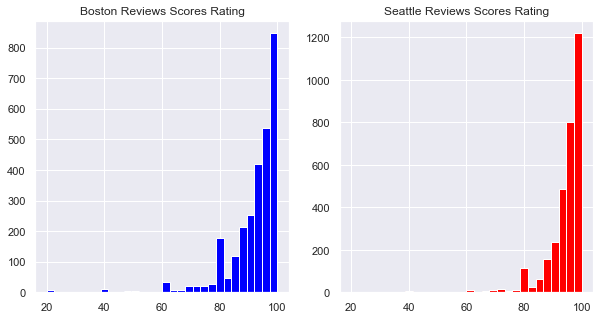

In [11]:
# Mostly positive reviews
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
listings_b['review_scores_rating'].sort_values().reset_index(drop=True).dropna().hist(color='blue', bins=30)
plt.title('Boston Reviews Scores Rating');
plt.subplot(1,2,2)
listings_s['review_scores_rating'].sort_values().reset_index(drop=True).dropna().hist(color='red', bins=30)
plt.title('Seattle Reviews Scores Rating');

## Result Discussion Question 1

- From the graphs below the Boston and Seattle datasets looks very similar, but there are some differences

1. Seattle seem to have a higher proportion of 100 compare to Boston
2. Boston seem to have more score of 80 specific, and below 80 as well

- Seattle seem to have higher scores than Boston

### 2. Is there any difference in the reviews score regarding to price, for Boston and Seattle?

The second question will be answered below

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


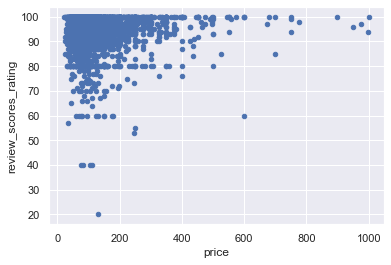

In [16]:
df_seattle.plot.scatter('price','review_scores_rating');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


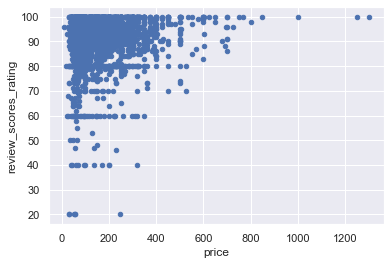

In [17]:
df_boston.plot.scatter('price','review_scores_rating');

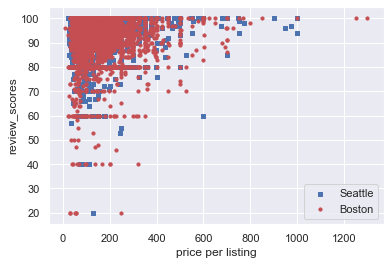

In [18]:
plt.scatter(df_seattle['price'], df_seattle['review_scores_rating'], s=10, c='b', marker="s", label='Seattle')
plt.scatter(df_boston['price'], df_boston['review_scores_rating'], s=10, c='r', marker="o", label='Boston')
plt.legend(loc='lower right');
plt.xlabel('price per listing')
plt.ylabel('review_scores')
plt.show()

## Results Discussion Question 2
- We can see that the two cities are very similar, with Seattle having some higher outliers and Boston seemingly to be more expensive for the reviews over 70. But overall the two seems to be very similar.

In [21]:
df_seattle.dropna(subset=['summary'], inplace=True)
df_boston.dropna(subset=['summary'], inplace=True)

### 3. Is there any difference in the words included in the description of listings between Boston and Seattle?

Let us answer the third question below

In [25]:
def build_word_cloud(df_column):
    '''
    input - A dataframe column with categorical words in it
    output - A wordcloud of the top words used in it. 
    It excludes obvious words we do not want to see in the word cloud along 
    with the standard STOPWORDS in the wordcloud module
    '''
    stop_words = ["seattle", "Boston","room"] + list(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(df_column))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

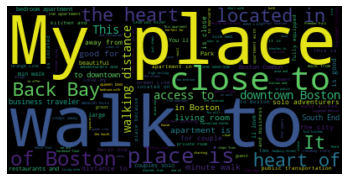

In [26]:
build_word_cloud(df_boston['summary'])

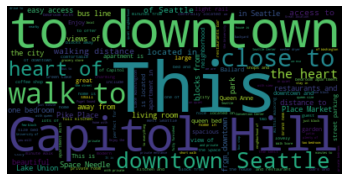

In [27]:
build_word_cloud(df_seattle['summary'])

## Results Discussion Question 3
- We can see that Seattle like to write Capitol Hill or downtown in their descriptions of their AirBnB listings. As well as the heart or "close to" seems to be important.
- Boston on the other hand seem to have walking distance very important. But otherwise close to and heart is also included in the listings for Boston.